In [1]:
import numpy as np
import torch
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def load_data():
    N = 500
    gq = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7,
                                                  n_samples=N, n_features=2,
                                                  n_classes=2, shuffle=True,
                                                  random_state=None)
    return gq

In [6]:
gaussian_quantiles = load_data()
X, y = gaussian_quantiles

print(X[0])
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

[-0.15016294 -0.23618509]
[0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0
 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1
 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1
 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0

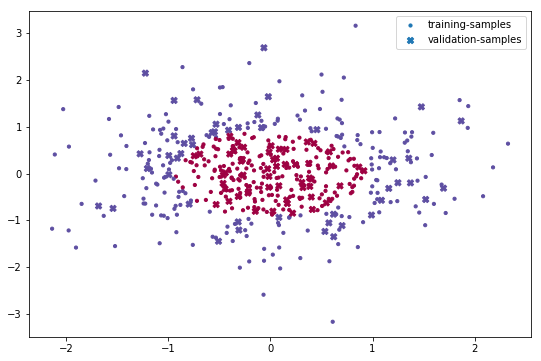

In [55]:
plt.figure(figsize=(9,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.', s=40, cmap=plt.cm.Spectral, label='training-samples')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='X', s=40, cmap=plt.cm.Spectral, label='validation-samples')
plt.legend()
plt.show()

In [74]:
class NeuralNetwork:
    def __init__(self, n_in, n_hidden, n_out):
        self.n_x = n_in
        self.n_h = n_hidden
        self.n_y = n_out

        self.W1 = torch.rand(self.n_h, self.n_x) * 0.01
        self.b1 = torch.zeros(self.n_h, 1)
        self.W2 = torch.rand(self.n_y, self.n_h) * 0.01
        self.b2 = torch.zeros(self.n_y, 1)
                        
    def my_forward(self, torch_X):
        self.Z1 = self.W1.matmul(torch_X.t()) + self.b1
        self.A1 = torch.tanh(self.Z1)
        self.Z2 = self.W2.matmul(self.A1) + self.b2
        self.A2 = torch.sigmoid(self.Z2)  
        
    def my_backward(self, torch_X, torch_y):
        m = torch_X.shape[0]
        
        self.dZ2 = self.A2 - torch_y
        
        self.dW2 = (1. / m) * torch.matmul(self.dZ2, self.A1.t())
        self.db2 = (1. / m) * torch.sum(self.dZ2, dim=1, keepdim=True)
        self.dZ1 = torch.mul(torch.matmul(self.W2.t(), self.dZ2), 1 - torch.pow(self.A1, 2))
        self.dW1 = (1. / m) * torch.matmul(self.dZ1, torch_X)
        self.db1 = (1. / m) * torch.sum(self.dZ1, dim=1, keepdim=True)
        
    def train(self, training_X, training_y, validation_X, validation_y, epochs, learning_rate):
        m = training_X.shape[0]
        for e in range(epochs):
            
            self.my_forward(training_X)
        
            training_loss = -torch.sum(torch.mul(torch.log(self.A2), training_y) + torch.mul(torch.log(1-self.A2),  (1 - training_y))) / m
        
            self.my_backward(training_X, training_y)
            
            self.W1 -= learning_rate * self.dW1
            self.b1 -= learning_rate * self.db1
            self.W2 -= learning_rate * self.dW2
            self.b2 -= learning_rate * self.db2
            
            if e % 250 == 0:
                m = validation_X.shape[0]
                self.my_forward(validation_X)
                validation_loss = -torch.sum(torch.mul(torch.log(self.A2), validation_y) + torch.mul(torch.log(1-self.A2),  (1 - validation_y))) / m
                print("Training loss: {}".format(training_loss))
                print("Validation loss: {}".format(validation_loss))
            
training_X = torch.from_numpy(X_train).float()
training_y = torch.from_numpy(y_train).float()

validation_X = torch.from_numpy(X_test).float()
validation_y = torch.from_numpy(y_test).float()

nn = NeuralNetwork(2, 10, 1)
nn.train(training_X, training_y, validation_X, validation_y, 2500, 0.5)

Training loss: 0.693141043186
Validation loss: 0.693335652351
Training loss: 2.76989412308
Validation loss: 0.693528354168
Training loss: 2.76691007614
Validation loss: 0.689796447754
Training loss: 2.75716686249
Validation loss: 0.685436844826
Training loss: 2.07632923126
Validation loss: 0.566590845585
Training loss: 0.817863702774
Validation loss: 0.232468351722
Training loss: 0.614675700665
Validation loss: 0.18021915853
Training loss: 0.530499279499
Validation loss: 0.153168022633
Training loss: 0.468806952238
Validation loss: 0.135324537754
Training loss: 0.423593908548
Validation loss: 0.122744657099
